AI for Medical Sciences and Psychology by Tshepo Chris Nokeri, Apress. 2022

# Chapter 2 Realizing Patterns in Diseases with Neural Networks

This chapter purportedly contains the application of artificial neural networks in modelling medical data. It properly executes deep belief networks to model data and predicts whether a patient suffers from a disease (i.e., cardiovascular and diabetes). Equally, it appraises the networks with key metrics to find out the extent to which the networks differentiate patients who suffer from the disease from those who do not.


# Classifying Patients’ Cardiovascular Disease Diagnosis Outcome Data by Executing a Deep Belief Network

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
cardiovascular_data = pd.read_csv(r"C:\Users\i5 lenov\Desktop\Next_Chapter\source_code\cardio\cardio_train.csv", sep=";")
cardiovascular_data.drop(["id"], axis = 1, inplace = True)
cardiovascular_data.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [2]:
cardiovascular_data["age"] = round(cardiovascular_data["age"] / 365.25, 2)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set("talk","ticks", font_scale = 1, font = "Calibri")
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300

In [4]:
sns.pairplot(cardiovascular_data)

## Preprocessing the Cardiovascular Disease Diagnosis Outcome Data

In [5]:
import numpy as np
x_cardio = np.array(cardiovascular_data.iloc[::, 0:11])
y_cardio = np.array(cardiovascular_data.iloc[::, -1])

## Assigning Training and Test Data

In [6]:
from sklearn.model_selection import train_test_split
x_train_cardio, x_test_cardio, y_train_cardio, y_test_cardio = train_test_split(x_cardio, y_cardio, test_size = 0.2, random_state = 0)
x_train_cardio, x_val_cardio, y_train_cardio, y_val_cardio = train_test_split(x_train_cardio, y_train_cardio, test_size = 0.1, random_state = 0)

## Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
standard_scaler_for_cardio = StandardScaler()
x_train_cardio = standard_scaler_for_cardio.fit_transform(x_train_cardio)
x_test_cardio = standard_scaler_for_cardio.transform(x_test_cardio)

In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense

## Executing the Deep Belief Network to Classify Patients’ Cardiovascular Disease Diagnosis Outcome Data

In [9]:
def cardiovascular_dbn_function():
    cardiovascular_dbn_model = Sequential()
    cardiovascular_dbn_model.add(Dense(11, input_dim = 11, activation = "relu"))
    cardiovascular_dbn_model.add(Dense(11, activation = "relu"))
    cardiovascular_dbn_model.add(Dense(11, activation = "relu"))
    cardiovascular_dbn_model.add(Dense(11, activation = "relu"))
    cardiovascular_dbn_model.add(Dense(1, activation = "sigmoid"))
    cardiovascular_dbn_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    return cardiovascular_dbn_model

In [10]:
from keras.wrappers.scikit_learn import KerasClassifier
cardiovascular_dbn_model = KerasClassifier(build_fn = cardiovascular_dbn_function)

Using TensorFlow backend.


In [11]:
cardiovascular_dbn_model_history = cardiovascular_dbn_model.fit(x_train_cardio, y_train_cardio, validation_data = (x_val_cardio, y_val_cardio), epochs = 64, batch_size = 16)
cardiovascular_dbn_model_history

Epoch 1/64
3150/3150 [==============================] - 4s 1ms/step - loss: 0.6035 - accuracy: 0.6788 - val_loss: 21.1833 - val_accuracy: 0.5111
Epoch 2/64
3150/3150 [==============================] - 4s 1ms/step - loss: 0.5535 - accuracy: 0.7267 - val_loss: 23.4844 - val_accuracy: 0.5111
Epoch 3/64
3150/3150 [==============================] - 4s 1ms/step - loss: 0.5466 - accuracy: 0.7319 - val_loss: 19.2734 - val_accuracy: 0.5111
Epoch 4/64
3150/3150 [==============================] - 5s 2ms/step - loss: 0.5436 - accuracy: 0.7340 - val_loss: 17.3626 - val_accuracy: 0.5109
Epoch 5/64
3150/3150 [==============================] - 4s 1ms/step - loss: 0.5426 - accuracy: 0.7342 - val_loss: 16.7062 - val_accuracy: 0.5111
Epoch 6/64
3150/3150 [==============================] - 4s 1ms/step - loss: 0.5415 - accuracy: 0.7351 - val_loss: 23.8482 - val_accuracy: 0.5109
Epoch 7/64
3150/3150 [==============================] - 4s 1ms/step - loss: 0.5407 - accuracy: 0.7359 - val_loss: 10.5666 - val_ac

3150/3150 [==============================] - 4s 1ms/step - loss: 0.5347 - accuracy: 0.7389 - val_loss: 20.4233 - val_accuracy: 0.5086
Epoch 58/64
3150/3150 [==============================] - 4s 1ms/step - loss: 0.5347 - accuracy: 0.7399 - val_loss: 19.1601 - val_accuracy: 0.5111
Epoch 59/64
3150/3150 [==============================] - 4s 1ms/step - loss: 0.5348 - accuracy: 0.7398 - val_loss: 19.5527 - val_accuracy: 0.5082
Epoch 60/64
3150/3150 [==============================] - 4s 1ms/step - loss: 0.5348 - accuracy: 0.7412 - val_loss: 22.5505 - val_accuracy: 0.4989
Epoch 61/64
3150/3150 [==============================] - 4s 1ms/step - loss: 0.5349 - accuracy: 0.7399 - val_loss: 7.4006 - val_accuracy: 0.5111
Epoch 62/64
3150/3150 [==============================] - 4s 1ms/step - loss: 0.5346 - accuracy: 0.7398 - val_loss: 7.3914 - val_accuracy: 0.5111
Epoch 63/64
3150/3150 [==============================] - 4s 1ms/step - loss: 0.5346 - accuracy: 0.7400 - val_loss: 8.1850 - val_accuracy: 

## Classification Report

In [12]:
y_hat_cardiovascular_dbn_model = cardiovascular_dbn_model.predict(x_test_cardio)
actual_cardio = pd.DataFrame(y_test_cardio)
actual_cardio.columns = ["Actual"]
predicted_cardio = pd.DataFrame(y_test_cardio)
predicted_cardio.columns = ["Predicted"]
actual_and_predicted_cardio = pd.concat([actual_cardio, predicted_cardio], axis = 1)
actual_and_predicted_cardio.loc[actual_and_predicted_cardio.Actual == 0, "Actual"] = "No cardiovascular disease"
actual_and_predicted_cardio.loc[actual_and_predicted_cardio.Actual == 1, "Actual"] = "Presence of cardiovascular disease"
actual_and_predicted_cardio.loc[actual_and_predicted_cardio.Predicted == 0, "Predicted"] = "No cardiovascular disease"
actual_and_predicted_cardio.loc[actual_and_predicted_cardio.Predicted == 1, "Predicted"] = "Presence of cardiovascular disease"
actual_and_predicted_cardio

Actual                           Predicted
0               No cardiovascular disease           No cardiovascular disease
1               No cardiovascular disease           No cardiovascular disease
2               No cardiovascular disease           No cardiovascular disease
3               No cardiovascular disease           No cardiovascular disease
4               No cardiovascular disease           No cardiovascular disease
...                                   ...                                 ...
13995  Presence of cardiovascular disease  Presence of cardiovascular disease
13996           No cardiovascular disease           No cardiovascular disease
13997  Presence of cardiovascular disease  Presence of cardiovascular disease
13998           No cardiovascular disease           No cardiovascular disease
13999  Presence of cardiovascular disease  Presence of cardiovascular disease

[14000 rows x 2 columns]

### Considering the Deep Belief Network’s Performance

In [13]:
from sklearn.metrics import confusion_matrix
cardiovascular_dbn_model_confusion_matrix = pd.DataFrame(confusion_matrix(y_test_cardio,
                                                                          y_hat_cardiovascular_dbn_model),
                                                         index = ["Actual: No cardiovascular disease",
                                                                  "Actual: Presence of cardiovascular disease"],
                                                         columns = ("Predicted: No cardiovascular disease",
                                                                    "Predicted: Presence of cardiovascular disease"))
cardiovascular_dbn_model_confusion_matrix

Predicted: No cardiovascular disease  \
Actual: No cardiovascular disease                                           5576   
Actual: Presence of cardiovascular disease                                  2258   

                                            Predicted: Presence of cardiovascular disease  
Actual: No cardiovascular disease                                                    1493  
Actual: Presence of cardiovascular disease                                           4673

In [14]:
from sklearn.metrics import classification_report
cardiovascular_dbn_model_report = pd.DataFrame(classification_report(y_test_cardio,
                                                                     y_hat_cardiovascular_dbn_model,
                                                                     output_dict = True)).transpose()
cardiovascular_dbn_model_report

precision    recall  f1-score       support
0              0.711769  0.788796  0.748306   7069.000000
1              0.757866  0.674217  0.713599   6931.000000
accuracy       0.732071  0.732071  0.732071      0.732071
macro avg      0.734817  0.731507  0.730952  14000.000000
weighted avg   0.734590  0.732071  0.731123  14000.000000

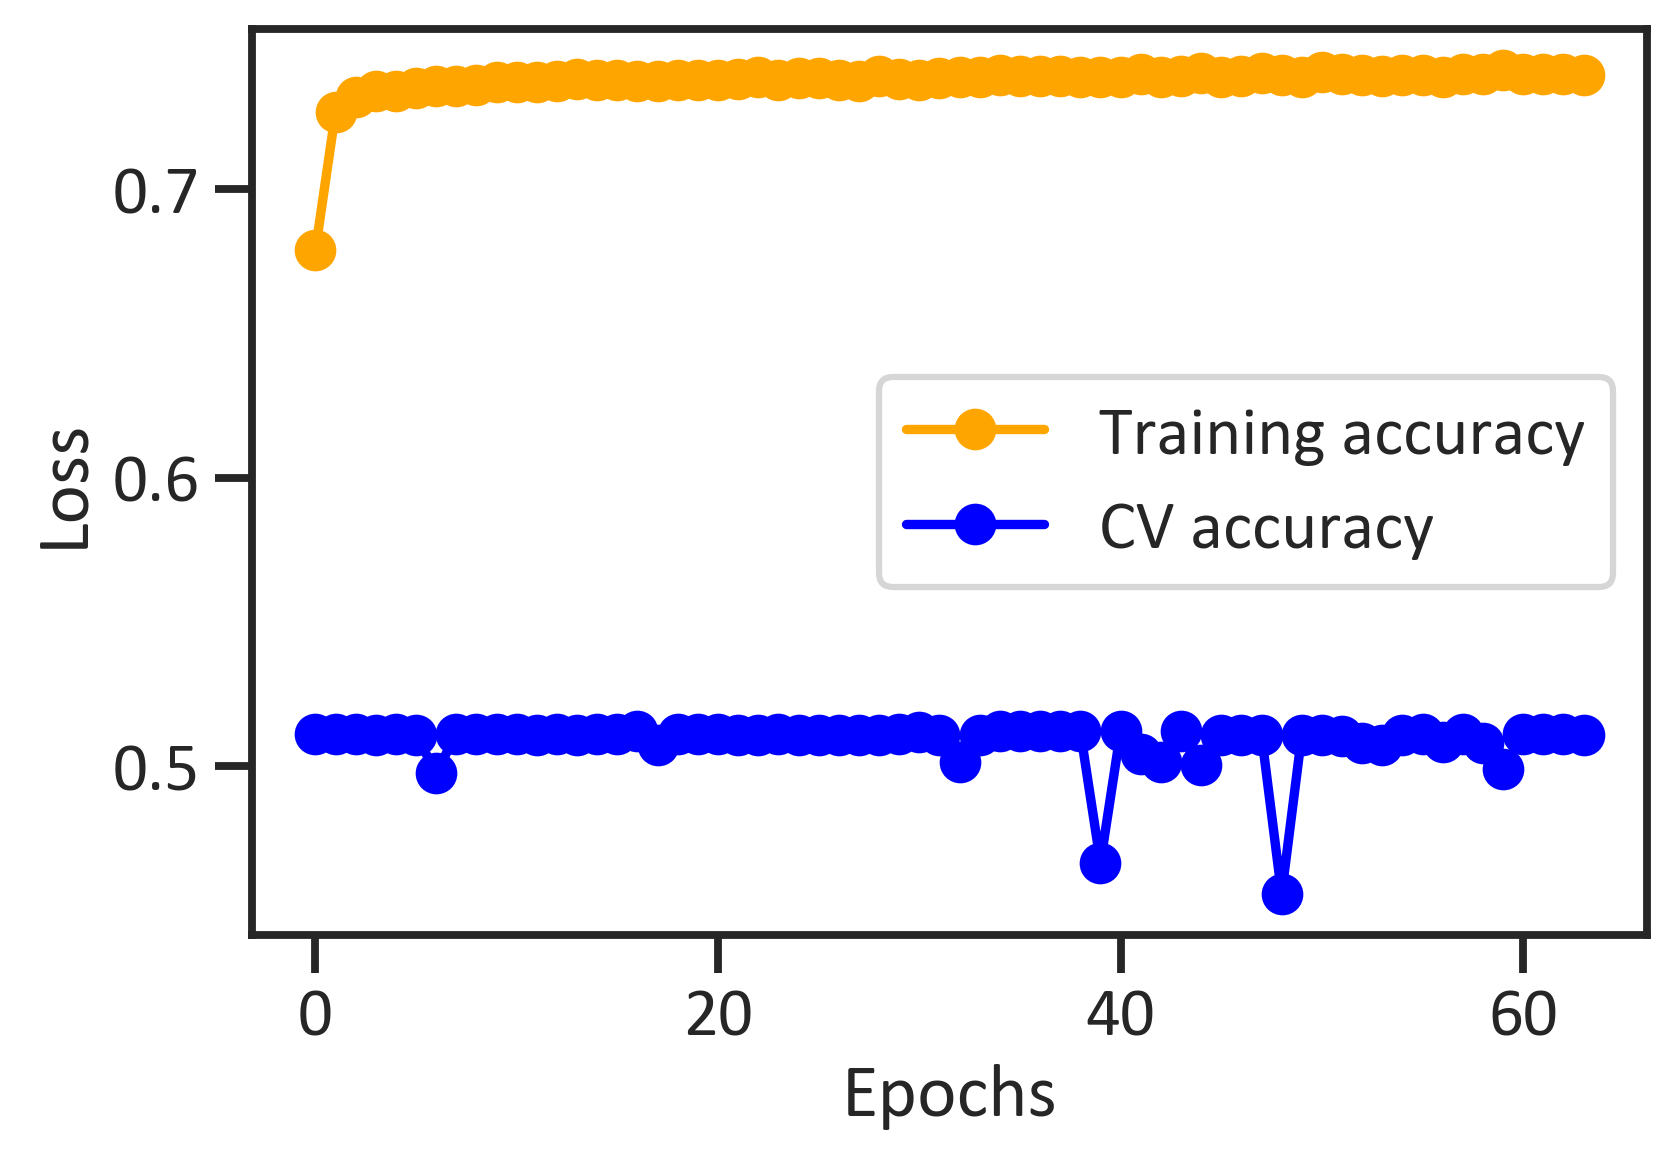

In [15]:
plt.plot(cardiovascular_dbn_model_history.history["accuracy"],
         color = "orange",
         marker = "o",
         label = "Training accuracy")
plt.plot(cardiovascular_dbn_model_history.history["val_accuracy"],
         color = "blue",
         marker = "o",
         label = "CV accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = "best")
plt.show()

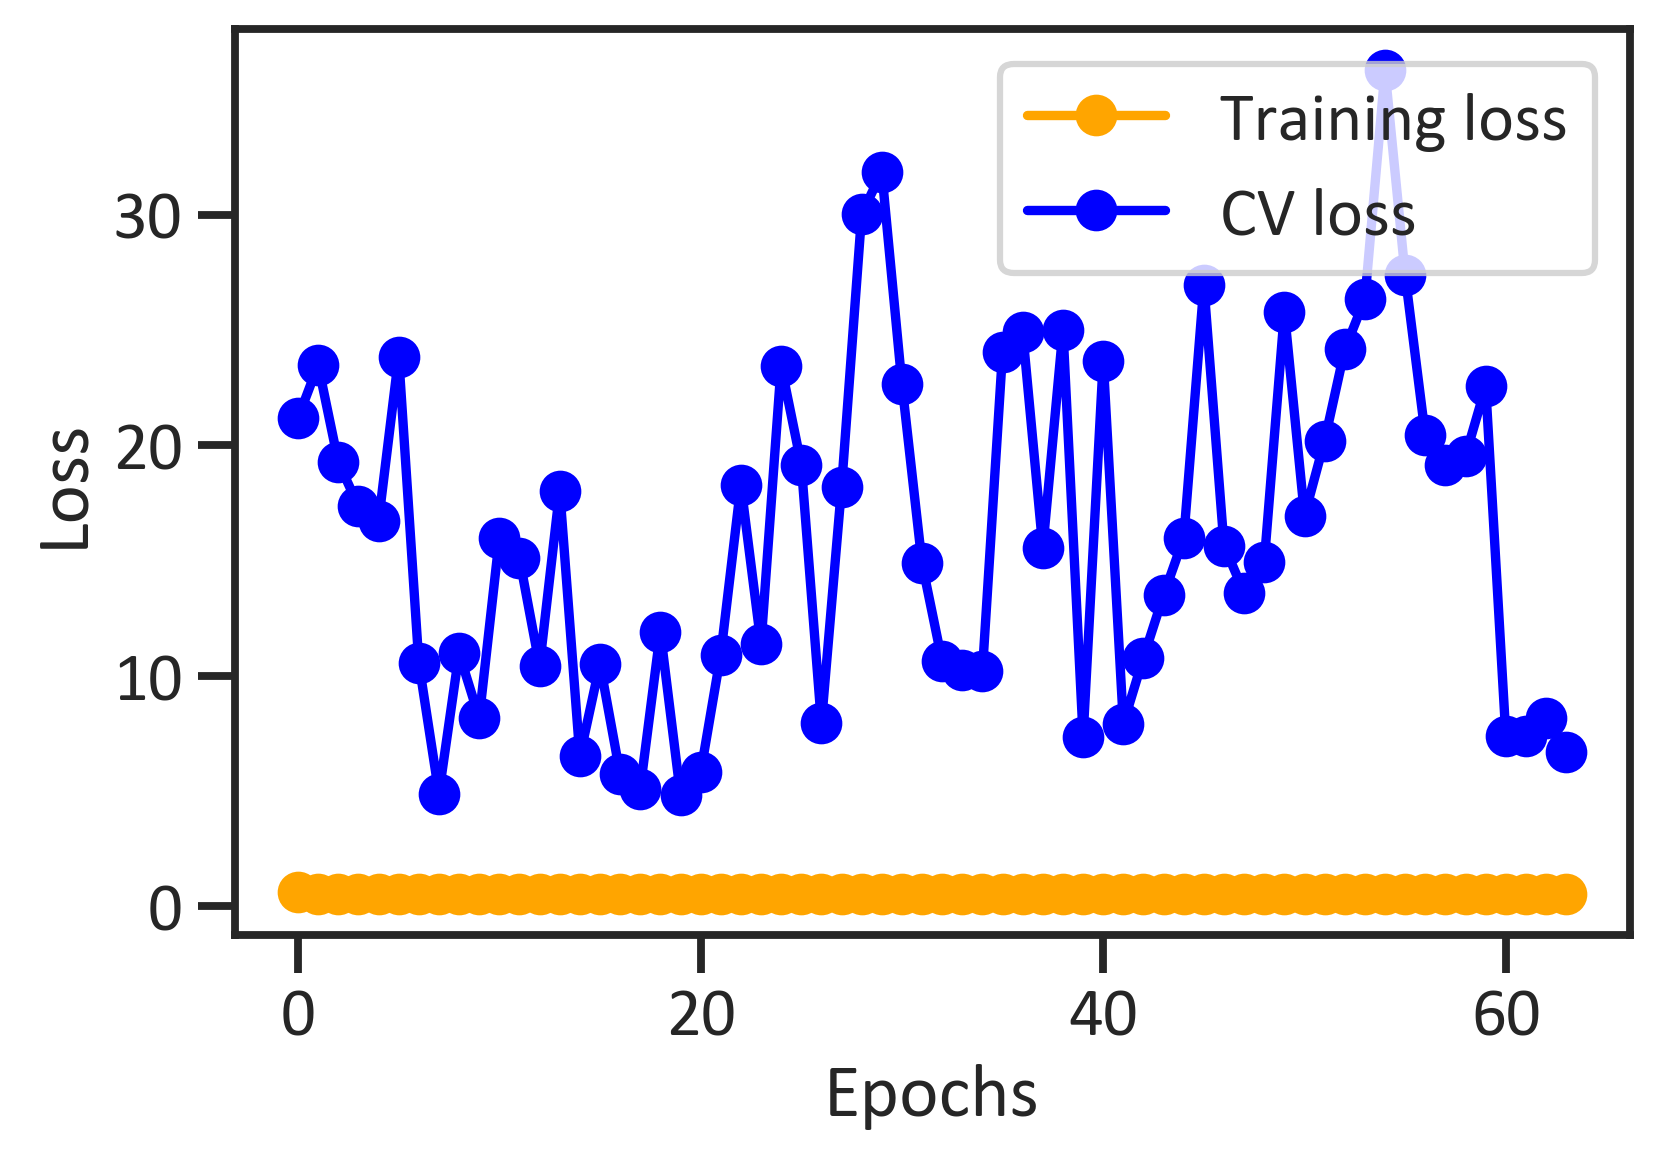

In [16]:
plt.plot(cardiovascular_dbn_model_history.history["loss"],
         color = "orange",
         marker = "o",
         label = "Training loss")
plt.plot(cardiovascular_dbn_model_history.history["val_loss"],
         color = "blue",
         marker = "o",
         label = "CV loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = "best")
plt.show()

# Classifying Patients’ Diabetes Diagnosis Outcome Data by Executing a Deep Belief Network

In [17]:
diabetes_data = pd.read_csv(r"C:\Users\i5 lenov\Desktop\Next_Chapter\source_code\cardio\diabetes.csv")

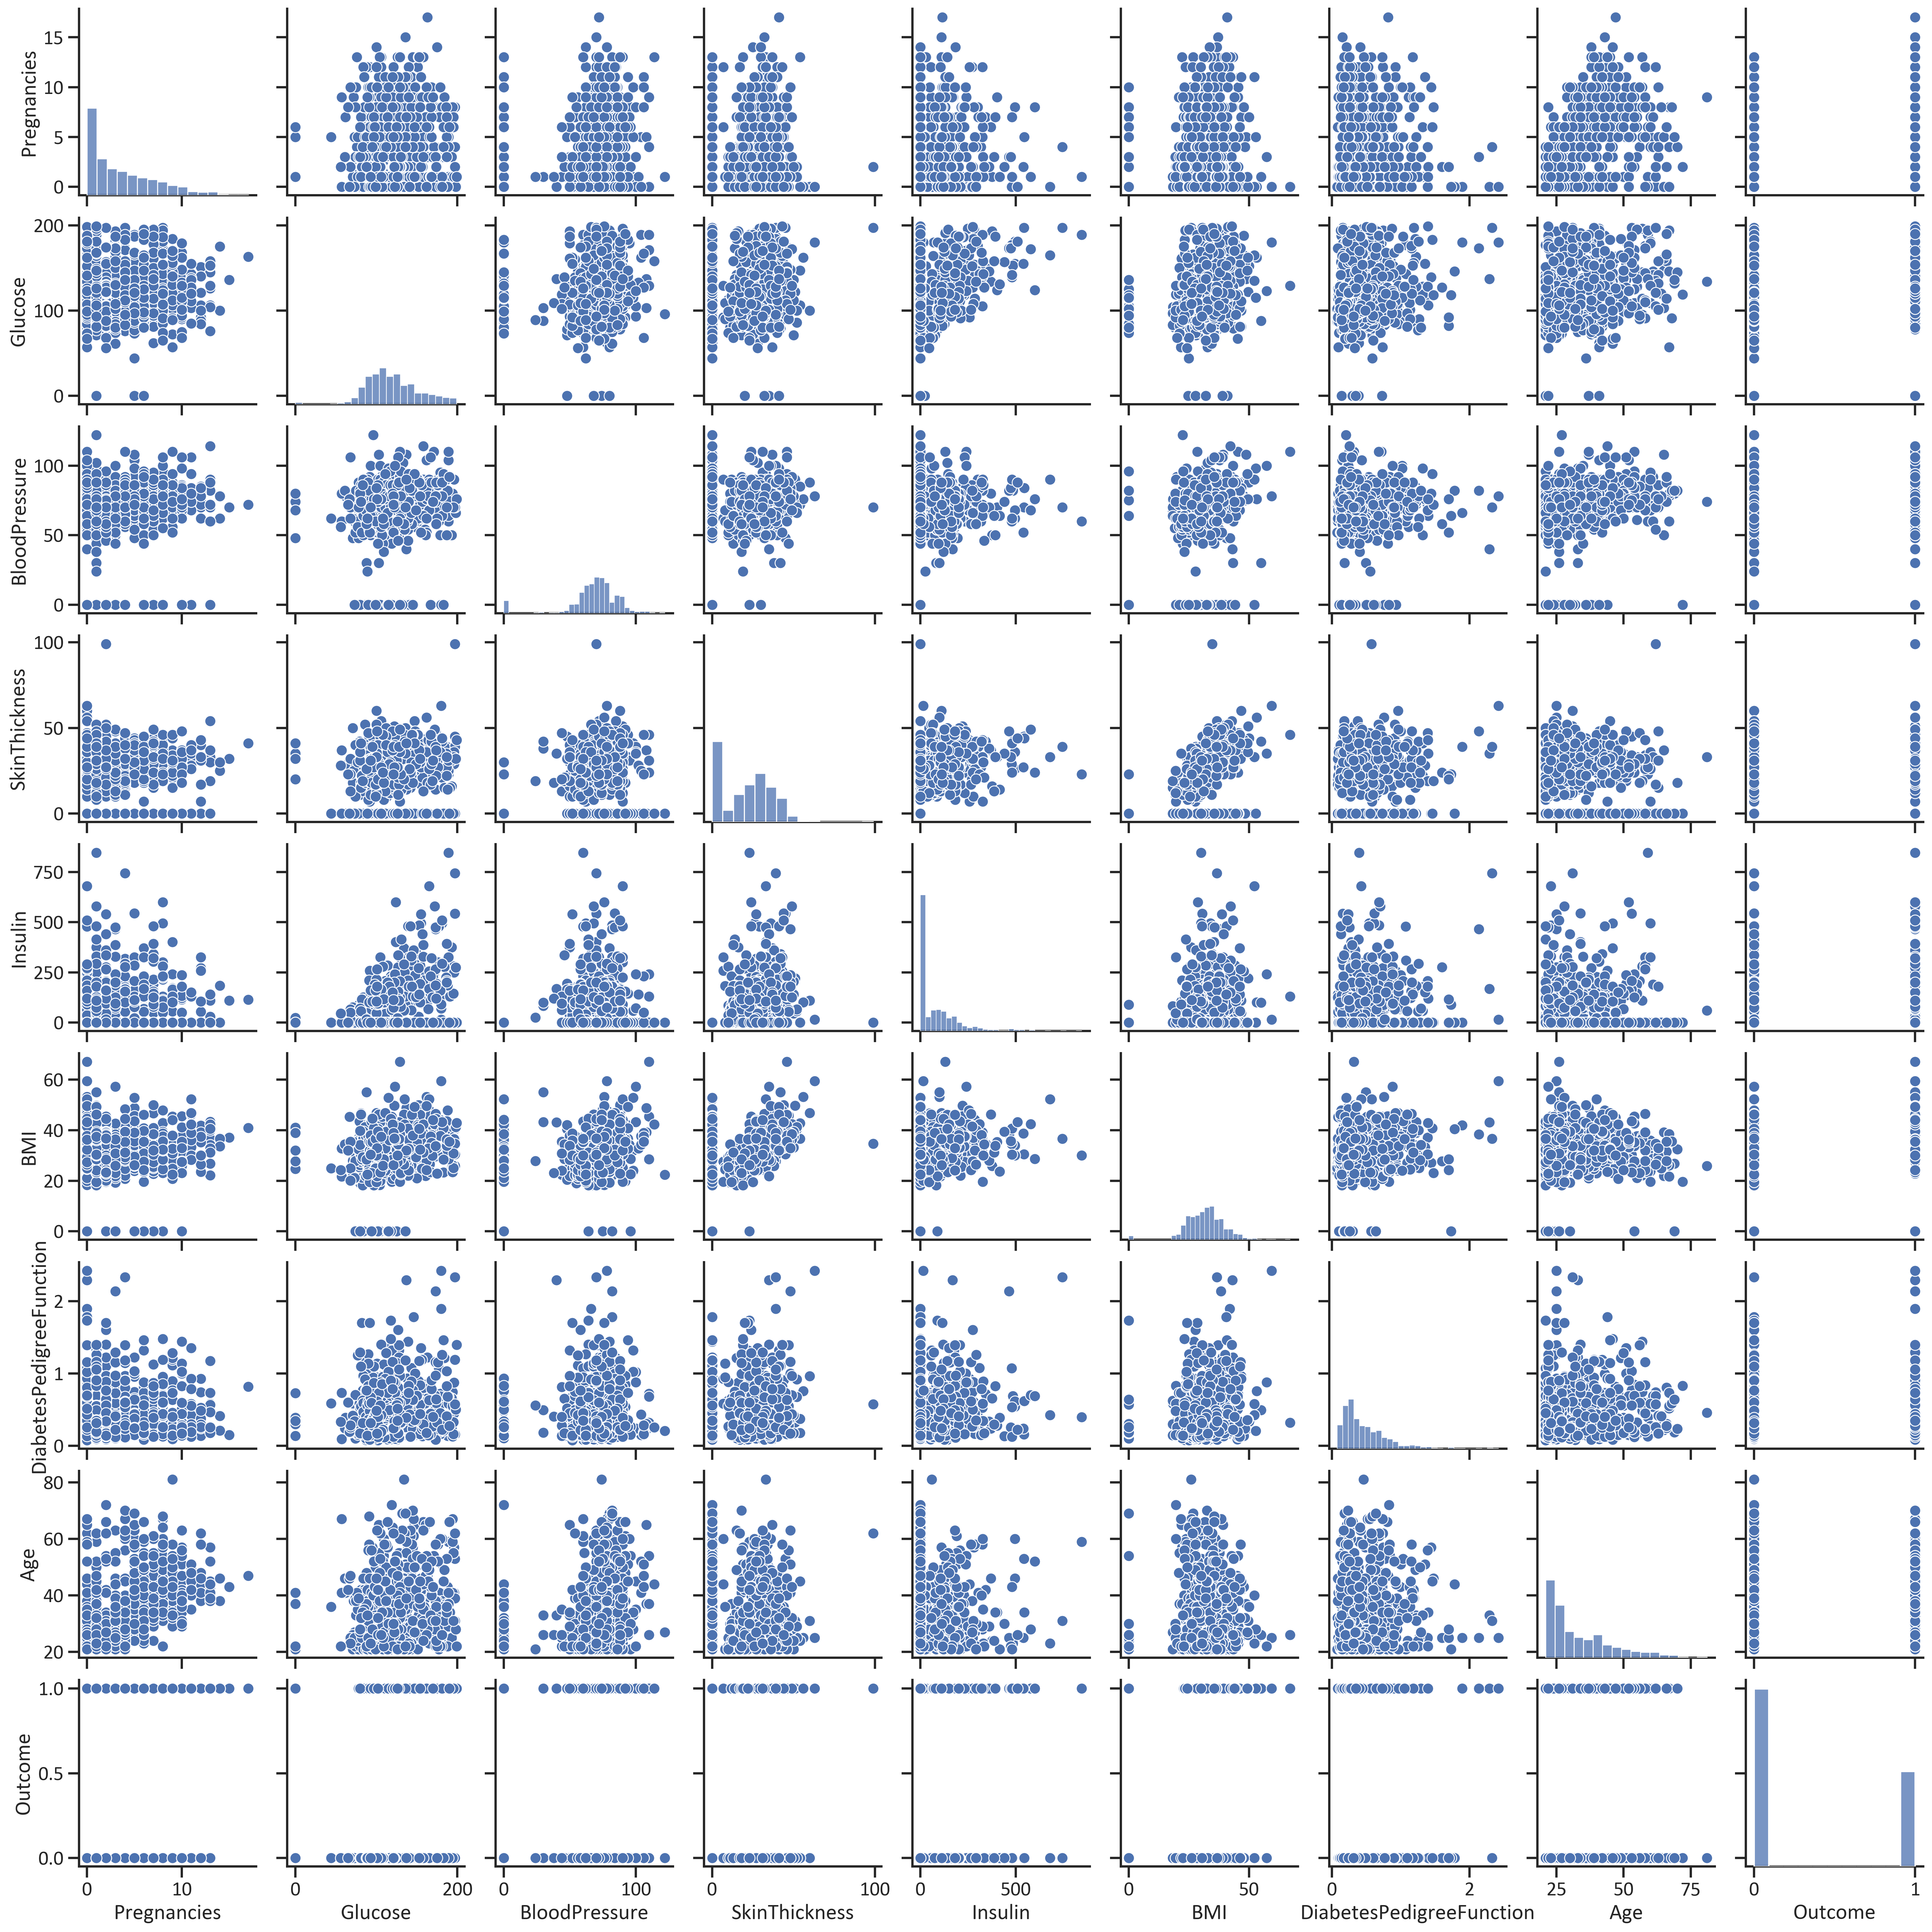

In [18]:
sns.pairplot(diabetes_data)

## Executing a Deep Belief Network to Classify Patients’ Diabetes Diagnosis Outcome Data

In [19]:
x_diabetes = np.array(diabetes_data.iloc[::, 0:8])
y_diabetes = np.array(diabetes_data.iloc[::, -1])
x_train_diabetes, x_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(x_diabetes, y_diabetes, test_size = 0.2, random_state = 0)
x_train_diabetes, x_val_diabetes, y_train_diabetes, y_val_diabetes = train_test_split(x_train_diabetes, y_train_diabetes, test_size = 0.1, random_state = 0)
standard_scaler_for_diabetes = StandardScaler()
x_train_diabetes = standard_scaler_for_diabetes.fit_transform(x_train_diabetes)
x_test_diabetes = standard_scaler_for_diabetes.transform(x_test_diabetes)
from tensorflow.python.keras.layers import Dropout
def diabetes_dbn_function():
    diabetes_dbn_model = Sequential()
    diabetes_dbn_model.add(Dense(8, input_dim = 8, activation="relu"))
    diabetes_dbn_model.add(Dropout(0.2))
    diabetes_dbn_model.add(Dense(8, activation = "relu"))
    diabetes_dbn_model.add(Dense(8, activation = "relu"))
    diabetes_dbn_model.add(Dense(8, activation = "relu"))
    diabetes_dbn_model.add(Dense(1, activation = "sigmoid"))
    diabetes_dbn_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    return diabetes_dbn_model
diabetes_dbn_model = KerasClassifier(build_fn = diabetes_dbn_function)
diabetes_dbn_model_history = diabetes_dbn_model.fit(x_train_diabetes, y_train_diabetes, validation_data = (x_val_diabetes, y_val_diabetes), epochs = 64, batch_size = 16)
diabetes_dbn_model_history

Epoch 1/64
35/35 [==============================] - 0s 8ms/step - loss: 0.6861 - accuracy: 0.6504 - val_loss: 2.7372 - val_accuracy: 0.3710
Epoch 2/64
35/35 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.6449 - val_loss: 2.9471 - val_accuracy: 0.3548
Epoch 3/64
35/35 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.6486 - val_loss: 3.9955 - val_accuracy: 0.3548
Epoch 4/64
35/35 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.6522 - val_loss: 6.3974 - val_accuracy: 0.3548
Epoch 5/64
35/35 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.6558 - val_loss: 10.0844 - val_accuracy: 0.3548
Epoch 6/64
35/35 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.6884 - val_loss: 15.3915 - val_accuracy: 0.3710
Epoch 7/64
35/35 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.7138 - val_loss: 22.5167 - val_accuracy: 0.3710
Epoch 8/64
35/35 

Epoch 59/64
35/35 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.7609 - val_loss: 51.3167 - val_accuracy: 0.3710
Epoch 60/64
35/35 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7844 - val_loss: 55.4097 - val_accuracy: 0.3710
Epoch 61/64
35/35 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7645 - val_loss: 55.2267 - val_accuracy: 0.3710
Epoch 62/64
35/35 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.7681 - val_loss: 51.6806 - val_accuracy: 0.3710
Epoch 63/64
35/35 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7609 - val_loss: 51.8232 - val_accuracy: 0.3710
Epoch 64/64
35/35 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.7681 - val_loss: 56.0501 - val_accuracy: 0.3710


In [20]:
y_hat_diabetes_dbn_model  = diabetes_dbn_model.predict(x_test_diabetes)
actual_diabetes = pd.DataFrame(y_test_diabetes)
actual_diabetes.columns = ["Actual"]
predicted_diabetes = pd.DataFrame(y_test_diabetes)
predicted_diabetes.columns = ["Predicted"]
actual_and_predicted_diabetes = pd.concat([actual_diabetes, predicted_diabetes], axis = 1)
actual_and_predicted_diabetes.loc[actual_and_predicted_diabetes.Actual == 0, "Actual"] = "Not diabetic"
actual_and_predicted_diabetes.loc[actual_and_predicted_diabetes.Actual == 1, "Actual"] = "Diabetic"
actual_and_predicted_diabetes.loc[actual_and_predicted_diabetes.Predicted == 0, "Predicted"] = "Not diabetic"
actual_and_predicted_diabetes.loc[actual_and_predicted_diabetes.Predicted == 1, "Predicted"] = "Diabetic"
actual_and_predicted_diabetes

Actual     Predicted
0        Diabetic      Diabetic
1    Not diabetic  Not diabetic
2    Not diabetic  Not diabetic
3        Diabetic      Diabetic
4    Not diabetic  Not diabetic
..            ...           ...
149      Diabetic      Diabetic
150  Not diabetic  Not diabetic
151      Diabetic      Diabetic
152  Not diabetic  Not diabetic
153  Not diabetic  Not diabetic

[154 rows x 2 columns]

### Considering the Deep Belief Network’s Performance

In [21]:
diabetes_dbn_model_confusion_matrix = pd.DataFrame(confusion_matrix(y_test_diabetes,
                                                                    y_hat_diabetes_dbn_model),
                                                   index=["Actual: No diabetes",
                                                          "Actual: Diabetic"],
                                                   columns = ("Predicted: No diabetes",
                                                              "Predicted: Diabetic"))
diabetes_dbn_model_confusion_matrix 

Predicted: No diabetes  Predicted: Diabetic
Actual: No diabetes                      90                   17
Actual: Diabetic                         16                   31

In [22]:
diabetes_dbn_model_report = pd.DataFrame(classification_report(y_test_diabetes,
                                                               y_hat_diabetes_dbn_model,
                                                               output_dict = True)).transpose()
diabetes_dbn_model_report

precision    recall  f1-score     support
0              0.849057  0.841121  0.845070  107.000000
1              0.645833  0.659574  0.652632   47.000000
accuracy       0.785714  0.785714  0.785714    0.785714
macro avg      0.747445  0.750348  0.748851  154.000000
weighted avg   0.787034  0.785714  0.786339  154.000000

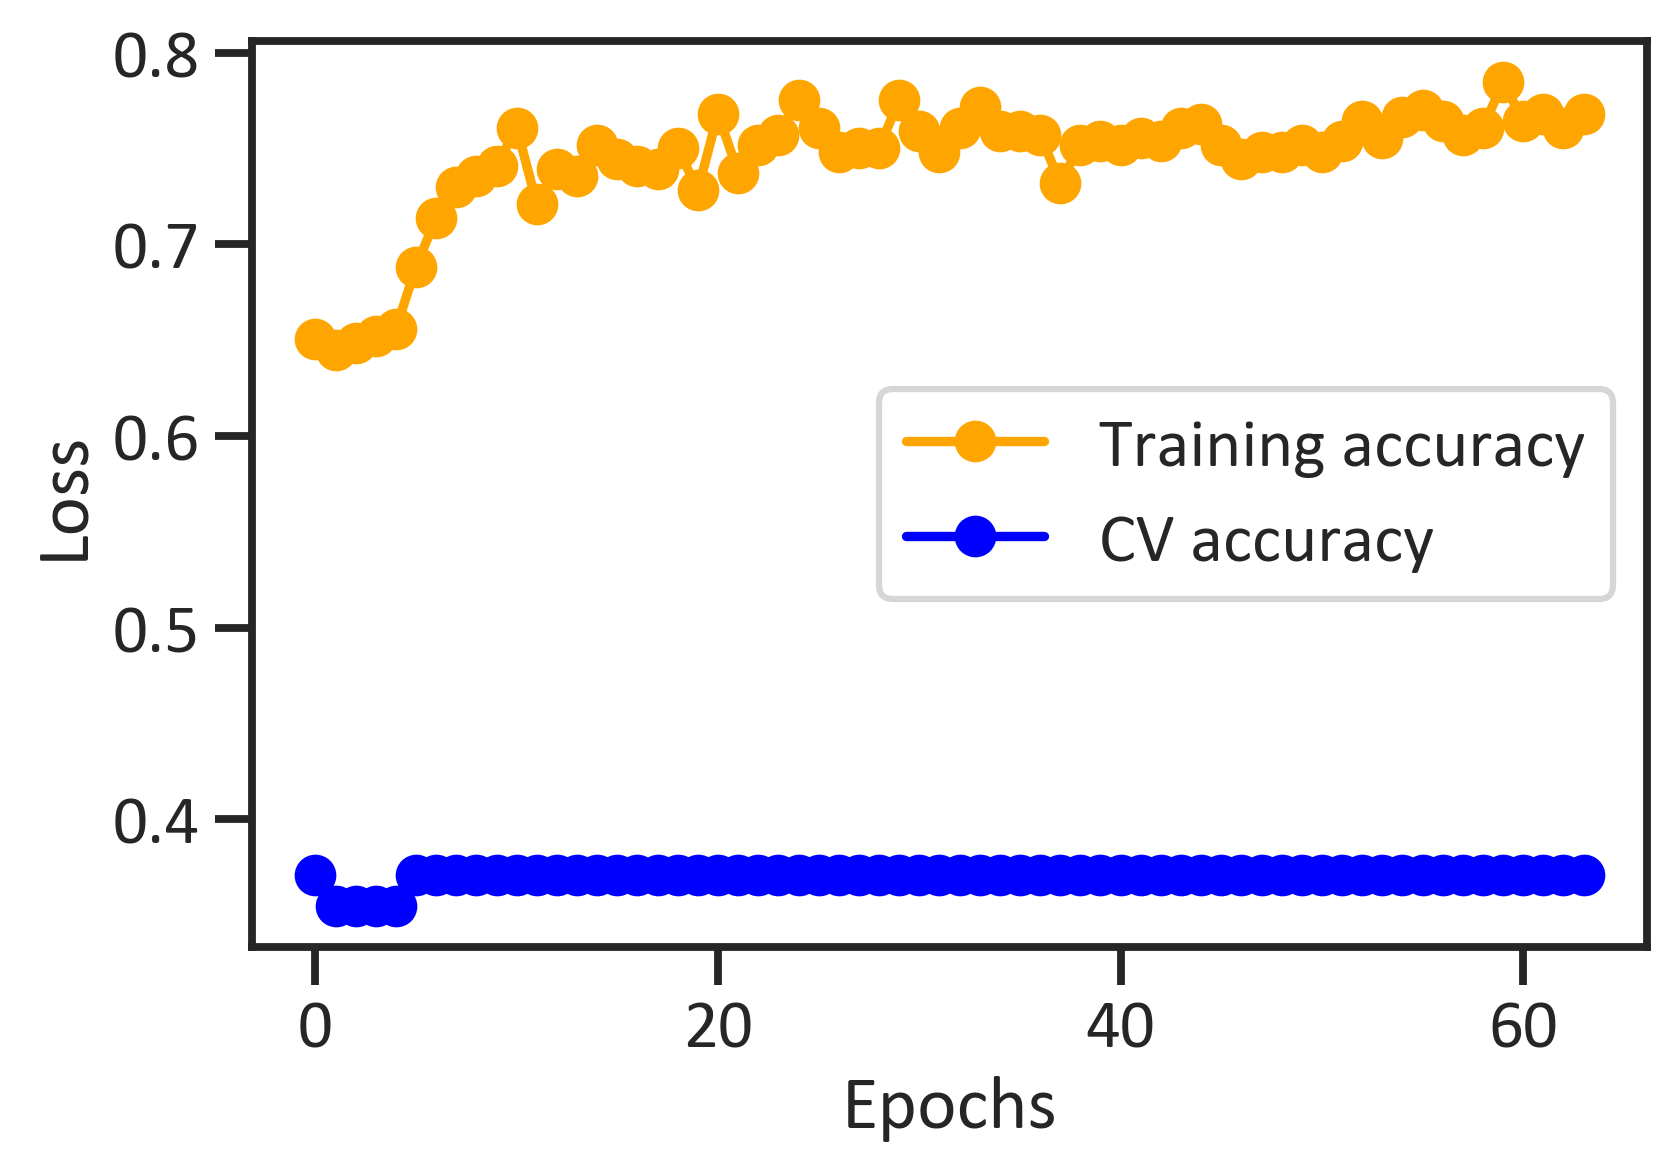

In [23]:
plt.plot(diabetes_dbn_model_history.history["accuracy"],
         color="orange",
         marker = "o",
         label = "Training accuracy")
plt.plot(diabetes_dbn_model_history.history["val_accuracy"],
         color="blue",
         marker = "o",
         label = "CV accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

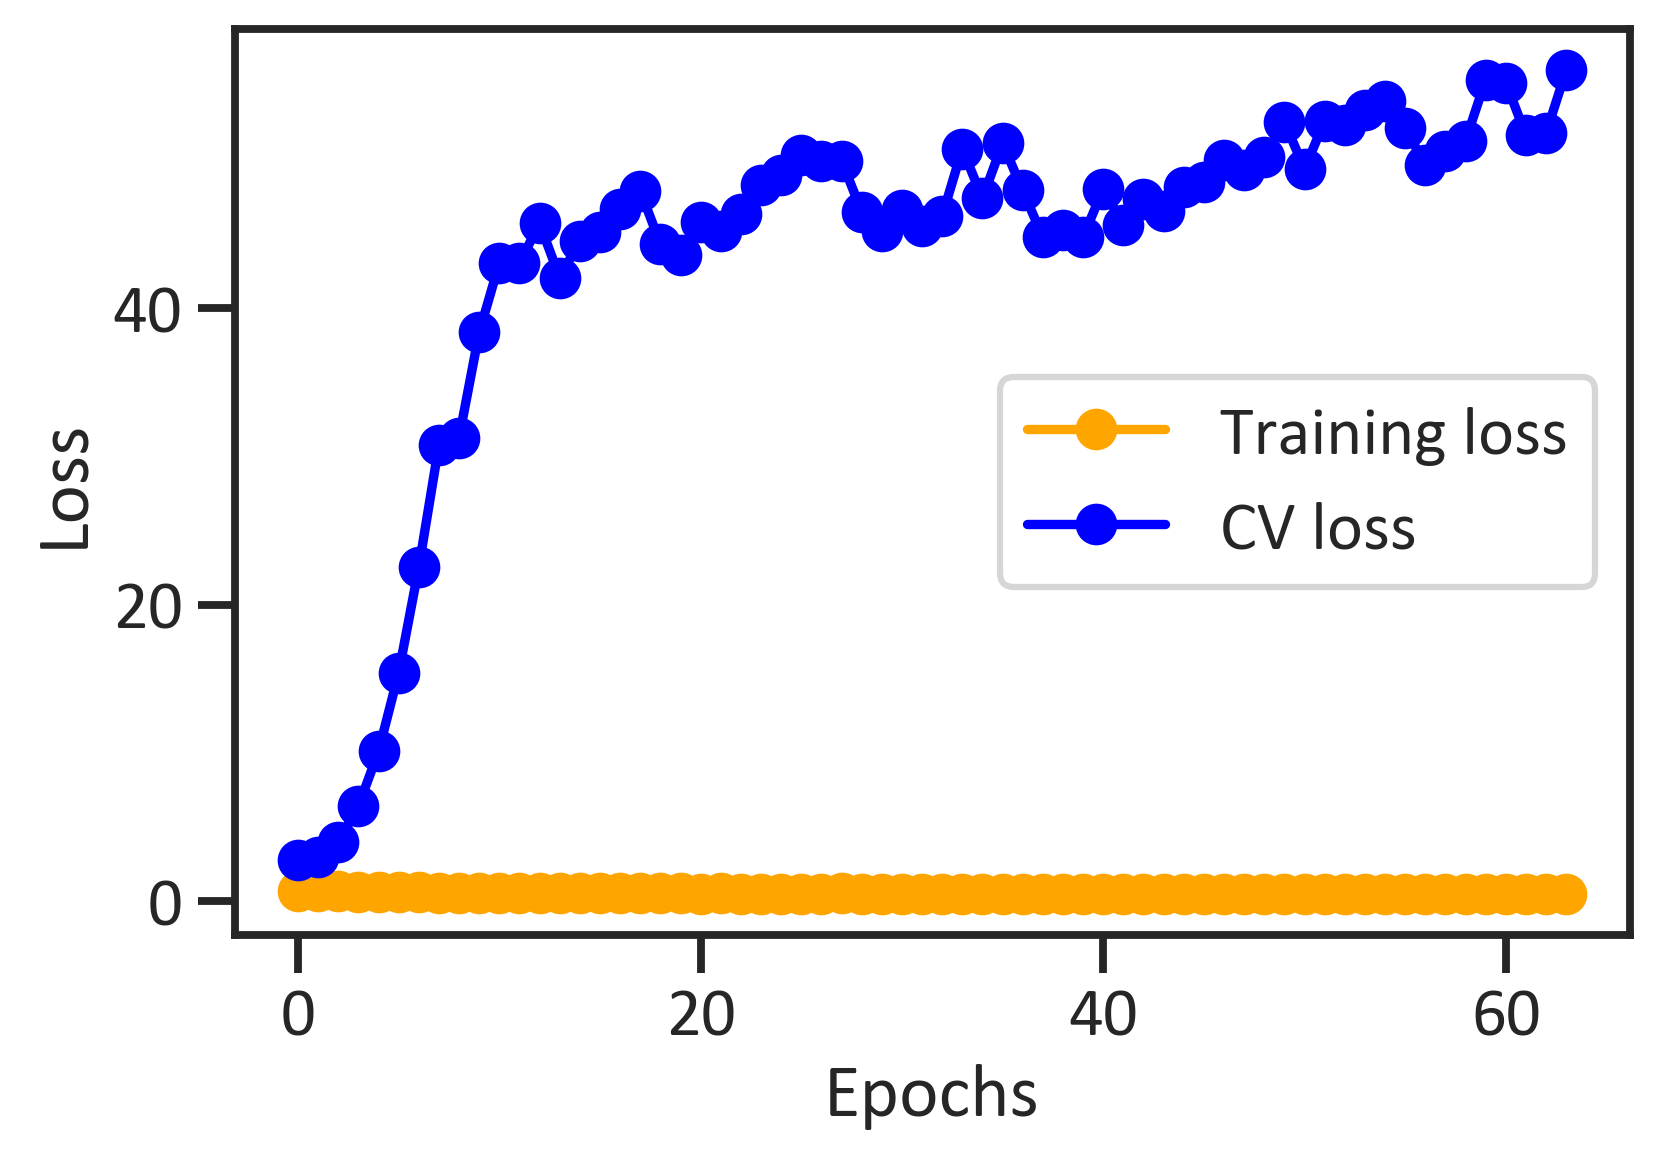

In [24]:
plt.plot(diabetes_dbn_model_history.history["loss"],
         color = "orange",
         marker = "o",
         label = "Training loss")
plt.plot(diabetes_dbn_model_history.history["val_loss"],
         color = "blue",
         marker = "o",
         label = "CV loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = "best")
plt.show()